In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_Churn_Prediction/Telco-Customer-Churn-Cleaned.csv")

In [ ]:
df = df.drop(columns="customerID", axis=1)

In [ ]:
y = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop(columns=["Churn"])
X['gender'] = X["gender"].map({"Male":1,"Female":0})

In [ ]:
internet_dependent_services = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for col in internet_dependent_services:
    X[col] = X[col].replace("No internet service", "No")

In [ ]:
X["MultipleLines"] = X["MultipleLines"].replace("No phone service","No")

In [ ]:
binary_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "MultipleLines",
    "Partner",
    "Dependents",
    "PaperlessBilling",
    "PhoneService"
]
for col in binary_cols:
    X[col] = X[col].map({"Yes": 1, "No": 0})

In [ ]:
X['InternetService'] = X['InternetService'].map({"No":0,"DSL":1,"Fiber optic":2})

In [ ]:
contract_encoder = OrdinalEncoder(
    categories=[["Two year", "One year", "Month-to-month"]]
)

X["Contract_Risk"] = contract_encoder.fit_transform(
    X[["Contract"]]
).astype(int)

X = X.drop(columns=['Contract'])

In [ ]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)

payment_encoded = ohe.fit_transform(df[["PaymentMethod"]])

payment_df = pd.DataFrame(
    payment_encoded,
    columns=ohe.get_feature_names_out(["PaymentMethod"]),
    index=df.index
)

X = pd.concat([X.drop(columns=["PaymentMethod"]), payment_df], axis=1)

In [ ]:
X = X.drop(columns="TotalCharges")

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Contract_Risk,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,29.85,2,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,0,0,0,56.95,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,0,1,53.85,2,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,1,0,0,0,42.30,1,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,0,1,70.70,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,1,1,84.80,1,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,...,0,1,1,1,103.20,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,0,0,1,29.60,2,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,...,0,0,0,1,74.40,2,0,0,0,1


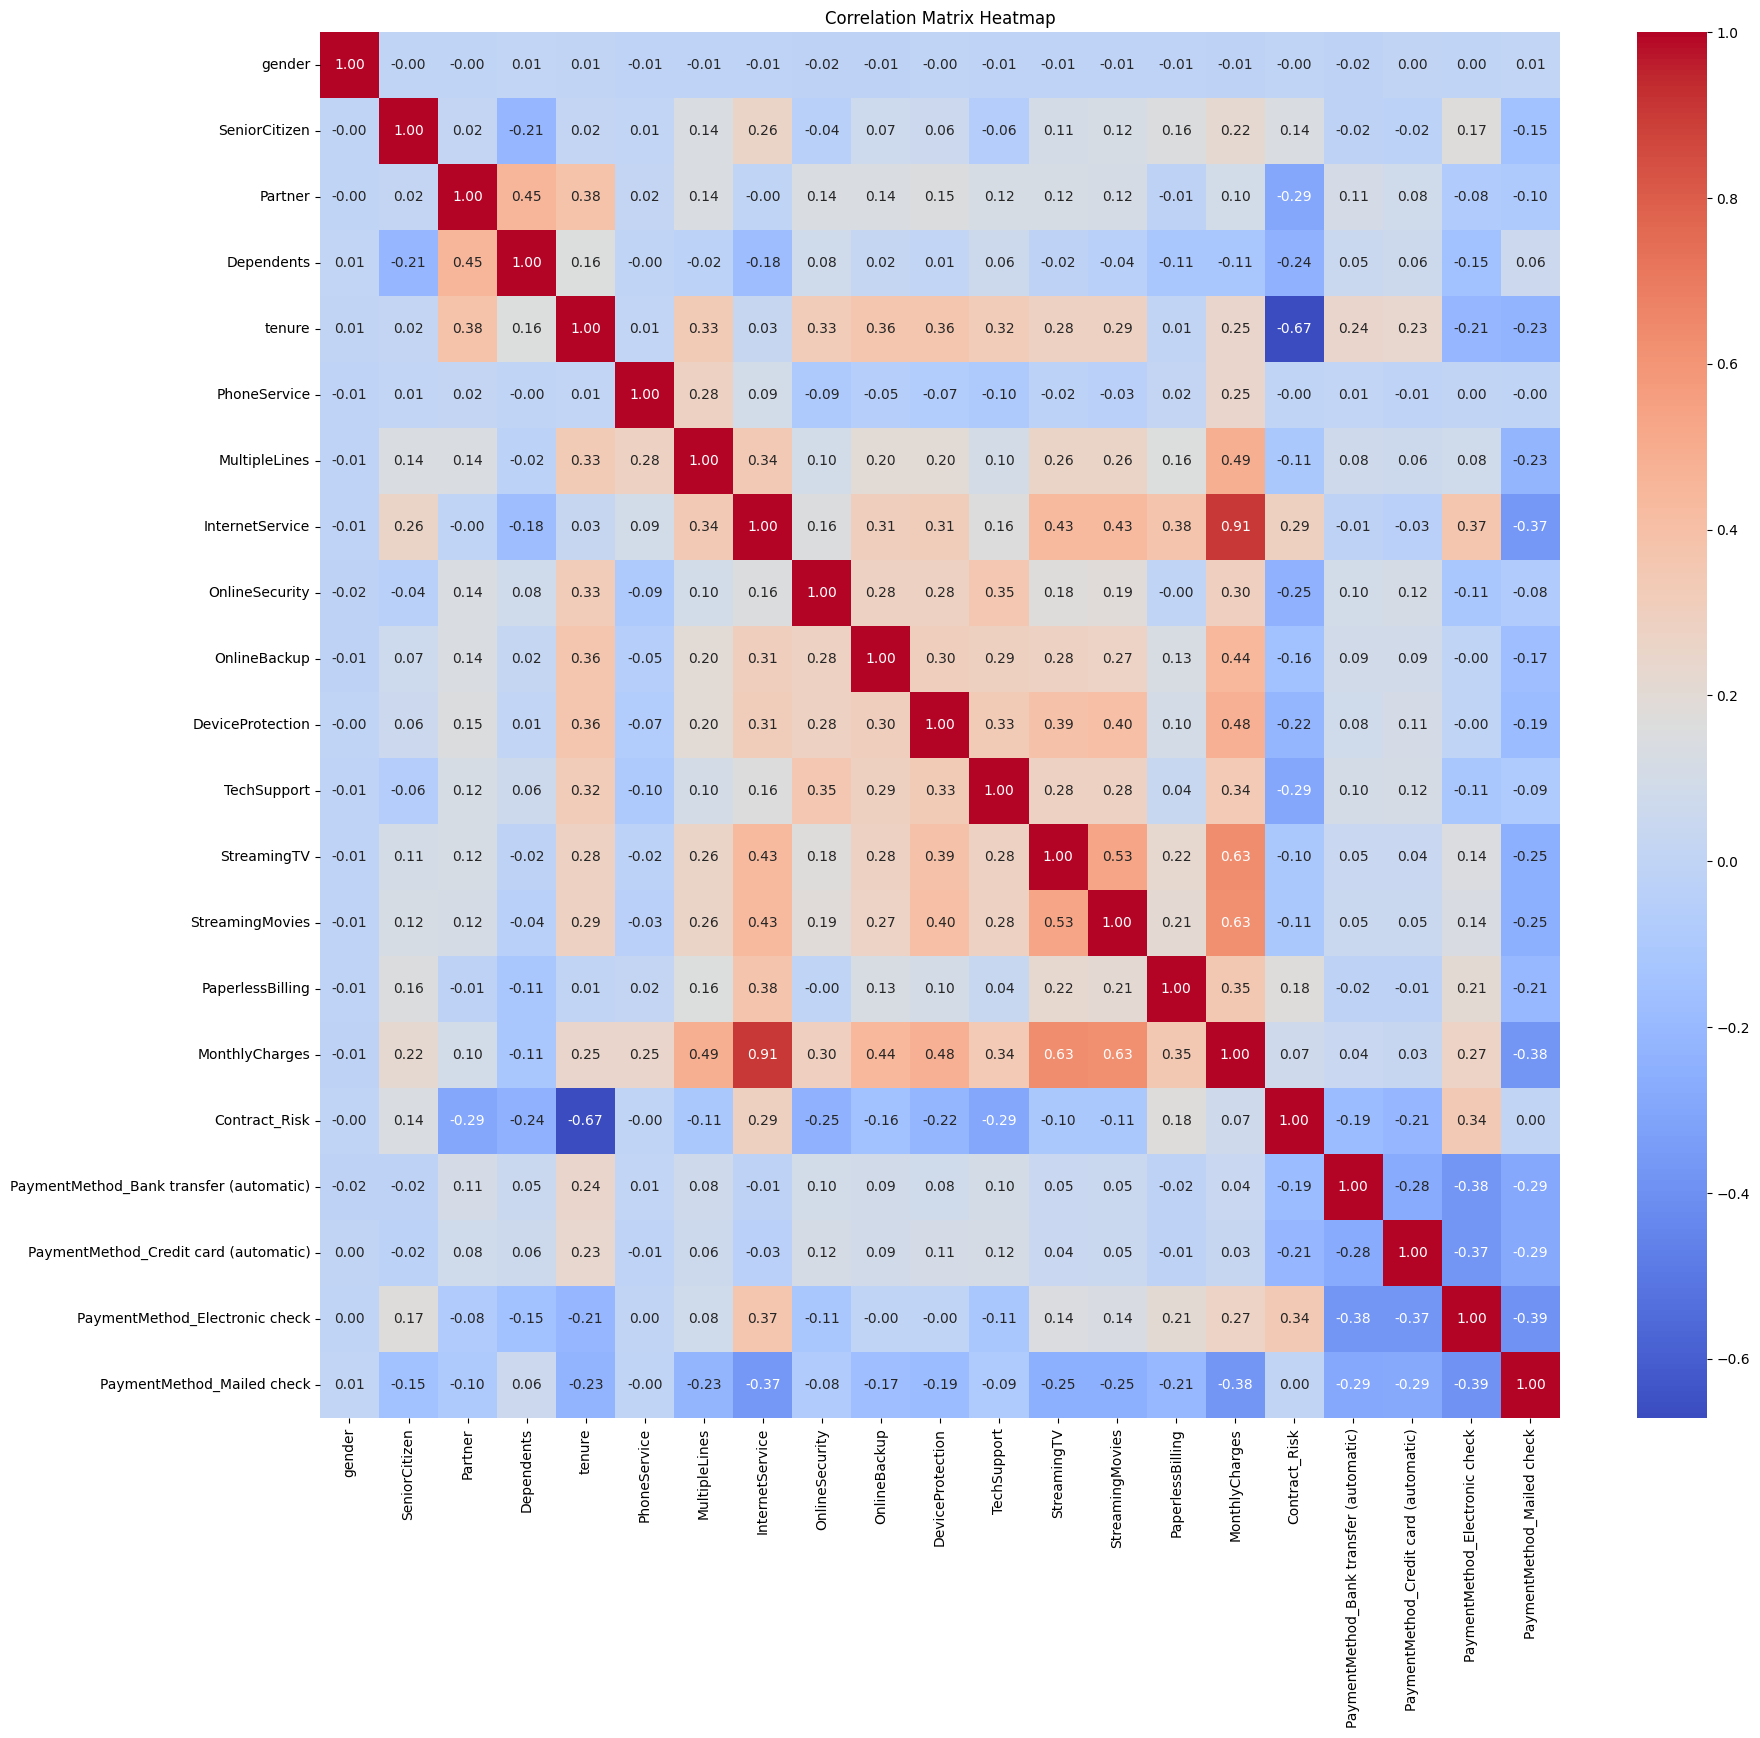

In [ ]:
corr_matrix = X.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X.corrwith(y)

,0
gender,-0.008612
SeniorCitizen,0.150889
Partner,-0.150448
Dependents,-0.164221
tenure,-0.352229
PhoneService,0.011942
MultipleLines,0.040102
InternetService,0.316846
OnlineSecurity,-0.171226
OnlineBackup,-0.082255


In [ ]:
X["PaymentMethod_Automatic"] = (
    (X["PaymentMethod_Credit card (automatic)"] == 1) |
    (X["PaymentMethod_Bank transfer (automatic)"] == 1)
).astype(int)

X = X.drop(columns=['PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)'])

In [ ]:
X = X.drop(columns=['gender','PhoneService','MultipleLines','StreamingTV','StreamingMovies','OnlineBackup','DeviceProtection'])

In [ ]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges',
       'Contract_Risk', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_Automatic'],
      dtype='object')

In [ ]:
X['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [ ]:
sample = SMOTE()
X, y = sample.fit_resample(X, y)

In [ ]:
df_combined = pd.concat([X, y], axis=1)

In [ ]:
save_path = '/content/drive/MyDrive/Customer_Churn_Prediction/Telco-Customer-Churn-Final.csv'
df_combined.to_csv(save_path, index=False)
print(f"File saved successfully to: {save_path}")

File saved successfully to: /content/drive/MyDrive/Customer_Churn_Prediction/Telco-Customer-Churn-Final.csv
